In [1]:
from calibrator import *
from analysis import *
from dobbel import *
import matplotlib.pyplot as plt
dob = dobbellogger()

In [7]:
lijst1 = []
lijst2 = []
lijst3 = []
lijst4 = []

for column, sign, side in [(2, 1, 1), (0, 1, 2), (1, 1, 3), (1, -1, 4), (0, -1, 5), (2, -1, 6)]:
    lijst1, lijst2, lijst3, lijst4 = cali_loop(column, sign, side, dob, 2, 1, 100, 2, 125, lijst1, lijst2, lijst3, lijst4)
    
cali = calibrate_rot_bias(lijst1, lijst2, lijst3, lijst4)

Leg de dobbelsteen met nummer  1  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  2  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  3  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  4  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  5  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf
Leg de dobbelsteen met nummer  6  boven
Wacht 1 secondes
Logging data for 2s
Done! The data is located in self.datadf


In [8]:
std_cali = cali_std(dob, 3, 100, 125)

Leg de dobbelsteen stil
Logging data for 3s
Done! The data is located in self.datadf


In [9]:
dob.connect()
dob.log(5, 400, 4, 500)
dob.download()
data = dob.datadf

Logging data for 5s
Done! The data is located in self.datadf


In [6]:
results = run_analysis(data, cali, std_cali, N=10, gamma=0.005)
# total_raap_duration = results.loc[0, 'Raap tijd']
# total_gooi_duration = results.loc[0, 'Gooi tijd']
# total_lucht_duration = results.loc[0, 'Lucht tijd']
# start_tot_loslaten = results.loc[0, 'Start tot los']
# start_tot_grond = results.loc[0, 'Start tot grond']
# laatste_zijde = results.loc[0, 'Laatste zijde']
# print("Dobbel tijd oprapen = ", total_raap_duration)
# print("Dobbel tijd van oprapen tot loslaten = ", total_gooi_duration)
# print("Dobbel tijd in de lucht = ", total_lucht_duration)
# print("Dobbel tijd tot loslaten vanaf begin programma = ", start_tot_loslaten)
# print("Zijde omhoog = ", laatste_zijde)
results.head()

0.01
0.015
0.02
0.025
0.030000000000000002
0.035
0.04
0.045
0.049999999999999996
0.05499999999999999
0.05999999999999999
0.06499999999999999
0.06999999999999999
0.075
0.08
0.085
0.09000000000000001
0.09500000000000001
0.10000000000000002


,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro,px,py,pz,...,q3,psi,theta,phi,Raap tijd,Gooi tijd,Lucht tijd,Start tot los,Start tot grond,Laatste zijde
0,0.0,-0.012822,0.001265,-0.967539,-0.326421,0.010290,0.301757,0.000000,0.000000e+00,0.000000,...,-0.003342,-0.000002,-0.006684,3.141327,0.0,0.0,0.0,0.0,0.0,6.0
1,31.0,-0.012269,0.003827,-0.970968,-0.541497,0.166597,0.335143,0.000002,9.473126e-07,-0.000136,...,-0.003331,0.000035,-0.006663,-3.141410,NaN,NaN,NaN,NaN,NaN,NaN
2,33.0,-0.013748,-0.000289,-0.975179,-0.213054,0.207700,0.063755,0.000003,7.795787e-07,-0.000154,...,-0.003328,0.000033,-0.006656,-3.141403,NaN,NaN,NaN,NaN,NaN,NaN
3,34.0,-0.013826,-0.000638,-0.975154,-0.048832,0.228252,-0.071940,0.000003,6.879860e-07,-0.000164,...,-0.003326,0.000034,-0.006652,-3.141402,NaN,NaN,NaN,NaN,NaN,NaN
4,36.0,-0.013983,-0.001337,-0.975106,0.132915,0.073648,-0.223608,0.000004,5.979193e-07,-0.000183,...,-0.003325,0.000042,-0.006650,-3.141407,NaN,NaN,NaN,NaN,NaN,NaN


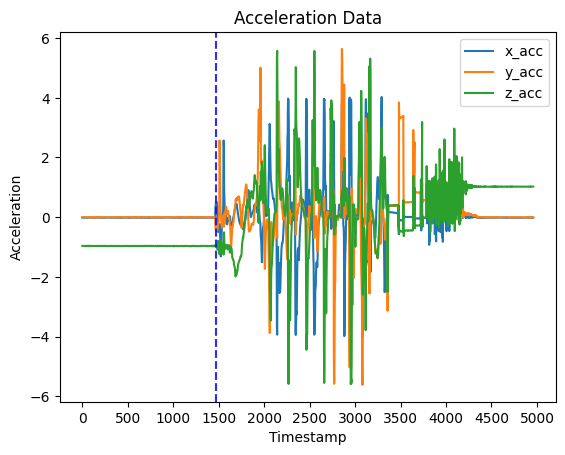

In [6]:
# Assume data is already defined
df = results

# Plot the accelerometer values
columns_to_plot = [col for col in df.columns if 'acc' in col]
df.plot(x='timestamp', y=columns_to_plot, kind='line')

# Vertical gray line for when the dice is picked up
plt.axvline(x=total_raap_duration, color='gray', linestyle='--', alpha=0.5, label='Start to Pickup')

# Vertical red line for when the dice leaves the hand
plt.axvline(x=start_tot_loslaten, color='blue', linestyle='--', alpha=0.5, label='Start to Release')

# Vertical blue line for when the dice hits the ground
plt.axvline(x=start_tot_grond, color='blue', linestyle='--', alpha=0.5, label='Start to Ground')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Acceleration Data')

# Set x-axis grid with a spacing of 500 units
plt.xticks(range(int(df['timestamp'].min()), int(df['timestamp'].max()) + 500, 500))

# Show the plot
plt.show()

In [10]:
dob.disconnect()

we are disconnected!
